In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
#plt.rcParams['figure.figsize']=17,8
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot
import folium

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import files
files=files.upload()

Saving city_day.csv to city_day.csv


In [0]:
df=pd.read_csv('city_day.csv')

In [0]:
df  = df.fillna(df.mean())

In [0]:
df['BTX'] = df['Benzene']+df['Toluene']+df['Xylene']
df.drop(['Benzene','Toluene','Xylene'],axis=1,inplace=True)

In [0]:
df['Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d') # date parse
df['year'] = df['Date'].dt.year # year
df['year'] = df['year'].fillna(0.0).astype(int)
df['month'] = [d.strftime('%b') for d in df.Date]

In [0]:
SO2_prophet=df.groupby('Date').sum()['SO2'].reset_index()
NO2_prophet=df.groupby('Date').sum()['NO2'].reset_index()
CO_prophet=df.groupby('Date').sum()['CO'].reset_index()

In [0]:
SO2_prophet.head()

,Date,SO2
0,2015-01-01,234.188734
1,2015-01-02,228.228734
2,2015-01-03,278.318734
3,2015-01-04,244.828734
4,2015-01-05,253.628734


In [0]:
SO2_prophet.columns = ['ds','y']

In [0]:
SO2_prophet.head()

,ds,y
0,2015-01-01,234.188734
1,2015-01-02,228.228734
2,2015-01-03,278.318734
3,2015-01-04,244.828734
4,2015-01-05,253.628734


In [0]:
from fbprophet import Prophet

In [0]:
m = Prophet(interval_width=0.95)
m.fit(SO2_prophet)
future = m.make_future_dataframe(periods=1095)
future.tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
3038,2023-04-27
3039,2023-04-28
3040,2023-04-29
3041,2023-04-30
3042,2023-05-01


In [0]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3038,2023-04-27,345.538817,-122.836055,750.745310
3039,2023-04-28,344.048241,-122.687076,755.122947
3040,2023-04-29,346.763820,-129.035657,752.929986
3041,2023-04-30,345.619323,-129.227823,770.055157
3042,2023-05-01,345.808789,-128.090891,754.279164


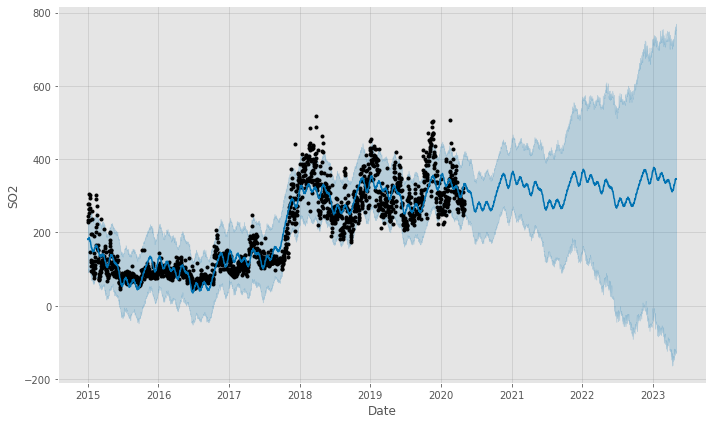

In [0]:
figure = m.plot(forecast, xlabel='Date', ylabel='SO2')

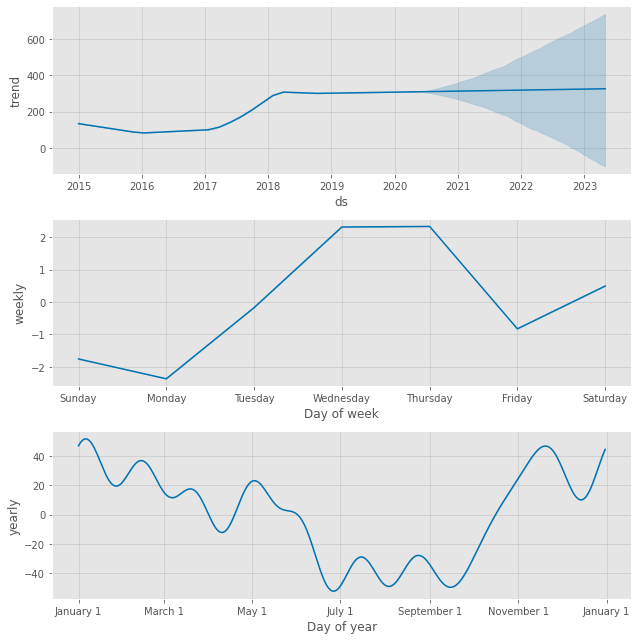

In [0]:
SO2_forecast_plot =m.plot_components(forecast)
plt.savefig('SO2_forecast_plot.png')

In [0]:
NO2_prophet.columns=['ds','y']

In [0]:
NO2_prophet.head()

,ds,y
0,2015-01-01,129.799102
1,2015-01-02,121.479102
2,2015-01-03,130.489102
3,2015-01-04,151.859102
4,2015-01-05,145.779102


In [0]:
m = Prophet(interval_width=0.95)
m.fit(NO2_prophet)
future = m.make_future_dataframe(periods=1095)
future.tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
3038,2023-04-27
3039,2023-04-28
3040,2023-04-29
3041,2023-04-30
3042,2023-05-01


In [0]:
forecast_NO2 = m.predict(future)
forecast_NO2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3038,2023-04-27,278.260865,-90.876427,659.521146
3039,2023-04-28,276.881129,-117.557171,662.875831
3040,2023-04-29,278.249105,-92.198077,686.678623
3041,2023-04-30,265.904388,-113.148713,630.575574
3042,2023-05-01,277.914635,-80.197981,673.952037


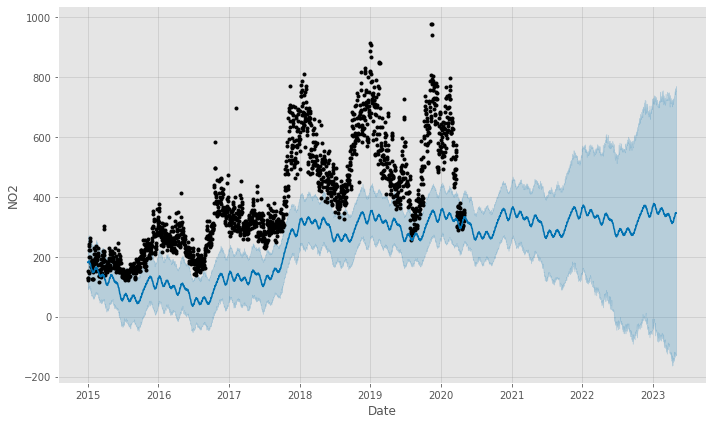

In [0]:
figure_NO2 = m.plot(forecast, xlabel='Date', ylabel='NO2')

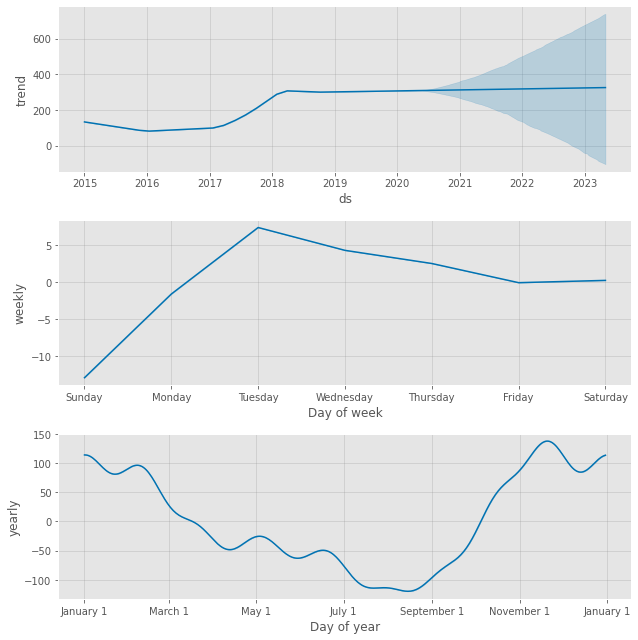

In [0]:
NO2_forecast_plot =m.plot_components(forecast)

In [0]:
CO_prophet.columns=['ds','y']

In [0]:
CO_prophet.head()

,ds,y
0,2015-01-01,29.77
1,2015-01-02,27.09
2,2015-01-03,58.96
3,2015-01-04,31.44
4,2015-01-05,47.60


In [0]:
m = Prophet(interval_width=0.95)
m.fit(CO_prophet)
future = m.make_future_dataframe(periods=1095)
future.tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
3038,2023-04-27
3039,2023-04-28
3040,2023-04-29
3041,2023-04-30
3042,2023-05-01


In [0]:
forecast_CO = m.predict(future)
forecast_CO[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3038,2023-04-27,-20.093784,-115.658182,81.065184
3039,2023-04-28,-21.263344,-114.082130,83.774451
3040,2023-04-29,-21.458076,-119.371481,75.773720
3041,2023-04-30,-20.796801,-114.247620,82.528832
3042,2023-05-01,-20.654597,-121.111990,83.678678


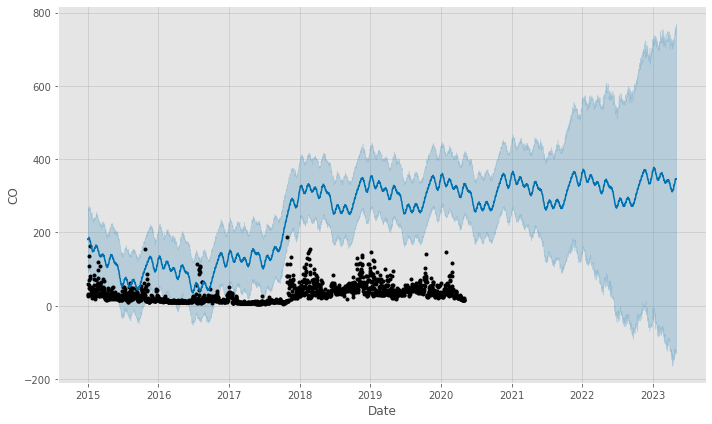

In [0]:
figure_NO2 = m.plot(forecast, xlabel='Date', ylabel='CO')

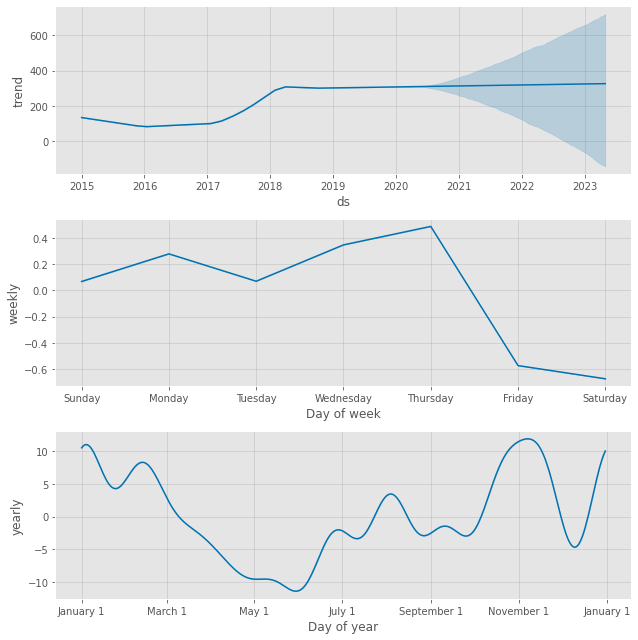

In [0]:
CO_forecast_plot =m.plot_components(forecast)

In [0]:
df_2020=df[df['Date']>='2020-01-01']
df_2020

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket,BTX,year,month
1826,Ahmedabad,2020-01-01,79.57,131.62,3.78,12.64,8.99,25.336162,3.78,27.70,23.67,216.0,Poor,38.150000,2020,Jan
1827,Ahmedabad,2020-01-02,72.59,128.86,3.63,14.38,9.73,25.336162,3.63,23.96,23.67,162.0,Moderate,37.370000,2020,Jan
1828,Ahmedabad,2020-01-03,69.54,128.99,7.06,15.13,12.65,25.336162,7.06,35.78,23.66,220.0,Poor,38.440000,2020,Jan
1829,Ahmedabad,2020-01-04,66.20,138.47,8.97,20.79,16.84,25.336162,8.97,38.98,23.65,254.0,Poor,37.780000,2020,Jan
1830,Ahmedabad,2020-01-05,55.99,110.41,5.41,15.34,11.53,25.336162,5.41,45.83,23.61,255.0,Poor,36.960000,2020,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26214,Thiruvananthapuram,2020-04-27,14.13,34.27,5.60,8.98,12.48,5.650000,0.49,5.50,42.41,63.0,Satisfactory,15.485821,2020,Apr
26215,Thiruvananthapuram,2020-04-28,23.84,44.32,6.27,10.01,13.80,5.730000,0.44,5.62,44.55,60.0,Satisfactory,15.485821,2020,Apr
26216,Thiruvananthapuram,2020-04-29,18.54,34.48,6.17,9.67,13.35,5.930000,0.51,5.52,38.97,57.0,Satisfactory,15.485821,2020,Apr
26217,Thiruvananthapuram,2020-04-30,20.57,48.19,6.28,9.52,13.56,5.840000,0.46,5.32,39.23,57.0,Satisfactory,15.485821,2020,Apr


In [0]:
cities = ['Ahmedabad','Delhi','Bengaluru','Kolkata','Hyderabad']

filtered_city_day = df[df['Date'] >= '2019-01-01']
AQI = filtered_city_day[filtered_city_day.City.isin(cities)][['Date','City','AQI','AQI_Bucket']]
AQI.head()

,Date,City,AQI,AQI_Bucket
1461,2019-01-01,Ahmedabad,1474.0,Severe
1462,2019-01-02,Ahmedabad,1246.0,Severe
1463,2019-01-03,Ahmedabad,1719.0,Severe
1464,2019-01-04,Ahmedabad,1264.0,Severe
1465,2019-01-05,Ahmedabad,1127.0,Severe


In [0]:
AQI_pivot = AQI.pivot(index='Date', columns='City', values='AQI')
AQI_pivot.fillna(method='bfill',inplace=True)
AQI_beforeLockdown = AQI_pivot['2020-01-01':'2020-03-25']
AQI_afterLockdown = AQI_pivot['2020-03-26':'2020-05-01']

In [0]:
from matplotlib.patches import Circle, Wedge, Rectangle

def degree_range(n): 
    start = np.linspace(0,180,n+1, endpoint=True)[0:-1]
    end = np.linspace(0,180,n+1, endpoint=True)[1::]
    mid_points = start + ((end-start)/2.)
    return np.c_[start, end], mid_points

def rot_text(ang): 
    rotation = np.degrees(np.radians(ang) * np.pi / np.pi - np.radians(90))
    return rotation

In [0]:
from matplotlib.patches import Circle, Wedge, Rectangle
def gauge(labels=['GOOD','OK','MODERATE','POOR','VERY POOR','EXTREME'], \
          colors='jet_r', arrow=1, title='', fname=False): 
    
    """
    some sanity checks first
    

"""
    
    N = len(labels)
    
    if arrow > N: 
        raise Exception("\n\nThe category ({}) is greated than \
        the length\nof the labels ({})".format(arrow, N))
    if isinstance(colors, str):
        cmap = cm.get_cmap(colors, N)
        cmap = cmap(np.arange(N))
        colors = cmap[::-1,:].tolist()
    if isinstance(colors, list): 
        if len(colors) == N:
            colors = colors[::-1]
        else: 
            raise Exception("\n\nnumber of colors {} not equal \
            to number of categories{}\n".format(len(colors), N))

    """
    begins the plotting
    """
    
    fig, ax = plt.subplots()

    ang_range, mid_points = degree_range(N)
    labels = labels[::-1]
    
    """
    plots the sectors and the arcs
    """
    patches = []
    for ang, c in zip(ang_range, colors): 
        # sectors
        patches.append(Wedge((0.,0.), .4, *ang, facecolor='w', lw=9))
        # arcs
        patches.append(Wedge((0.,0.), .4, *ang, width=0.10, facecolor=c, lw=10, alpha=0.5))
    
    [ax.add_patch(p) for p in patches]

    
    """
    set the labels (e.g. 'LOW','MEDIUM',...)
    """
    for mid, lab in zip(mid_points, labels): 

        ax.text(0.35 * np.cos(np.radians(mid)), 0.35 * np.sin(np.radians(mid)), lab, \
            horizontalalignment='center', verticalalignment='center', fontsize=14, \
            fontweight='bold', rotation = rot_text(mid))

    """
    set the bottom banner and the title
    """
    r = Rectangle((-0.4,-0.1),0.9,0.1, facecolor='w', lw=2)
    ax.add_patch(r)
    
    ax.text(0, -0.06, title, horizontalalignment='center', \
         verticalalignment='center', fontsize=22, fontweight='bold')
    pos = mid_points[abs(arrow - N)]
    
    ax.arrow(0, 0, 0.225 * np.cos(np.radians(pos)), 0.225 * np.sin(np.radians(pos)), \
                 width=0.04, head_width=0.08, head_length=0.1, fc='k', ec='k')
    
    ax.add_patch(Circle((0, 0), radius=0.02, facecolor='k'))
    ax.add_patch(Circle((0, 0), radius=0.01, facecolor='w', zorder=11))

    """
    removes frame and ticks, and makes axis equal and tight
    """
    
    ax.set_frame_on(False)
    ax.axes.set_xticks([])
    ax.axes.set_yticks([])
    ax.axis('equal')
    plt.tight_layout()



"Mumbai's AQI levels"

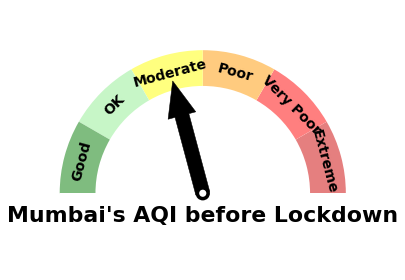

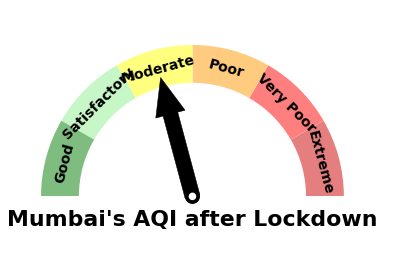

In [0]:
display("Mumbai's AQI levels")

gauge(labels=['Good','OK','Moderate','Poor','Very Poor','Extreme'], \
      colors=['#007A00','#90EE90','#ffff00','#FF9900','#ff0000','#CC0000'], arrow=3, title="Mumbai's AQI before Lockdown") 

gauge(labels=['Good','Satisfactory','Moderate','Poor','Very Poor','Extreme'], \
      colors=['#007A00','#90EE90','#ffff00','#FF9900','#ff0000','#CC0000'], arrow=3, title="Mumbai's AQI after Lockdown") 